In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

# Set seed for reproducibility
np.random.seed(42)

# Parameters
n_samples = 10000
n_features = 15
n_informative = 10
n_redundant = 2
n_classes = 2
fraud_ratio = 0.02  # 2% fraud

# Create synthetic classification dataset
X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    n_clusters_per_class=1,
    weights=[1 - fraud_ratio, fraud_ratio],
    flip_y=0.01,
    class_sep=1.0,
    random_state=42
)

# Create DataFrame
feature_names = [f'V{i}' for i in range(1, n_features + 1)]
df = pd.DataFrame(X, columns=feature_names)
df['Amount'] = np.abs(np.random.normal(loc=100, scale=50, size=n_samples)).round(2)
df['Time'] = np.random.randint(0, 86400, size=n_samples)  # seconds in a day
df['Class'] = y

# Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

# Preview
print(df.head())
print(df['Class'].value_counts(normalize=True))


         V1        V2        V3        V4        V5        V6        V7  \
0 -1.361339  0.445851  0.150740  0.644140 -1.603186 -1.936869 -0.355300   
1  3.699053 -1.312784 -3.439029  3.286441 -0.379231  1.915115 -0.860249   
2  0.873679 -2.526292  0.667929 -0.768346 -1.289571 -2.810633  2.013351   
3 -6.505061  3.541482  0.292239  1.790899 -0.646694 -1.608637  0.420376   
4  6.719023 -2.385958 -1.368586 -0.059810  0.141887  0.713041 -0.222935   

         V8        V9       V10       V11       V12       V13       V14  \
0 -0.663678 -0.095041 -0.135598 -0.659460  1.735521  0.232421  0.215581   
1 -3.459258  3.774006  1.918836 -1.730503  2.850952 -0.974697  0.907049   
2  0.557658 -0.888273 -1.320357 -2.058187  5.863730 -2.284218 -0.032678   
3 -6.008470  4.014756  2.848687 -2.371211 -0.908863 -4.263708 -1.465355   
4  2.951099 -1.055132 -0.130190 -2.273576  3.841330  1.821734  2.090776   

        V15  Amount   Time  Class  
0  0.696222   30.00  23552      0  
1 -0.639790   64.28  37780

In [2]:
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())
df.describe()


(10000, 18)
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
Amount    float64
Time        int32
Class       int64
dtype: object
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
Amount    0
Time      0
Class     0
dtype: int64


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,Amount,Time,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.117084,-1.016017,-0.950214,0.943863,0.006860,-0.953519,0.010230,-0.953998,0.950646,1.009609,-0.961116,2.343046,-0.992765,0.988316,0.006572,100.766122,43103.384900,0.025300
std,3.507308,1.889859,1.666422,2.269961,1.002104,1.624174,1.002385,1.965247,1.808907,2.518152,1.626252,3.524865,1.706064,1.943680,0.991969,48.395931,25141.213704,0.157043
min,-14.900336,-7.837184,-7.005511,-8.335314,-3.616691,-6.792645,-3.852082,-9.881437,-5.423177,-8.437104,-7.031543,-10.989224,-7.104380,-6.495147,-3.634669,0.060000,14.000000,0.000000
25%,-2.200331,-2.286834,-2.064902,-0.590783,-0.653581,-2.047226,-0.664047,-2.285142,-0.261776,-0.669428,-2.071200,-0.020962,-2.143425,-0.329862,-0.648925,66.420000,21085.750000,0.000000
50%,0.074972,-1.018237,-0.957831,0.924272,0.001910,-0.971774,0.009592,-0.954507,0.973795,1.004315,-0.962464,2.344224,-0.984225,1.006162,0.003080,99.870000,43247.000000,0.000000
75%,2.504996,0.254801,0.174547,2.466155,0.656926,0.121453,0.674282,0.360791,2.173906,2.715953,0.136498,4.716157,0.148529,2.307180,0.664958,133.552500,65002.750000,0.000000
max,12.667955,6.149246,6.571477,9.102344,4.694473,8.238616,3.845123,7.236439,7.572607,11.060392,5.987452,17.722572,6.778254,8.899831,3.963162,296.310000,86390.000000,1.000000


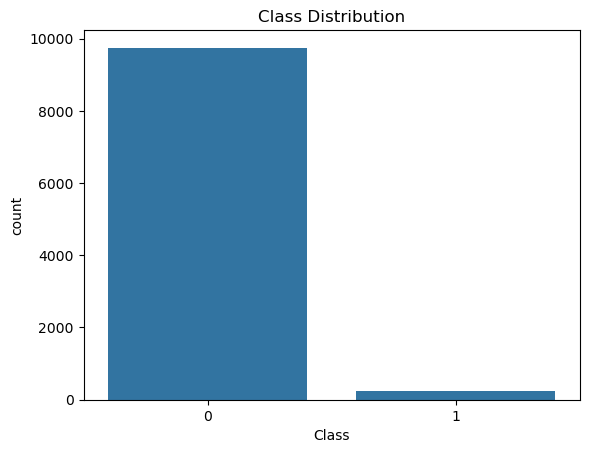

Fraudulent transactions: 2.53%


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# Percentage
fraud_ratio = df['Class'].value_counts(normalize=True)[1] * 100
print(f"Fraudulent transactions: {fraud_ratio:.2f}%")


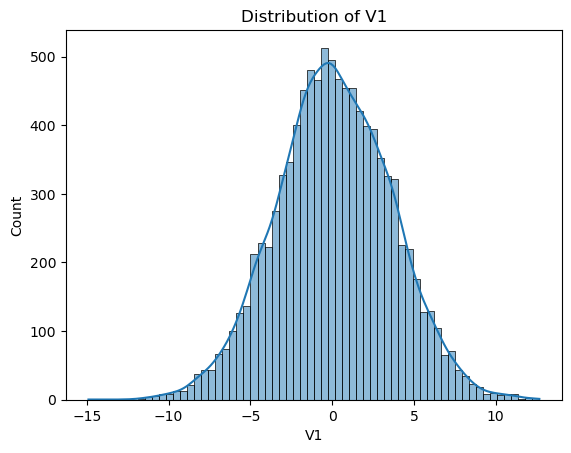

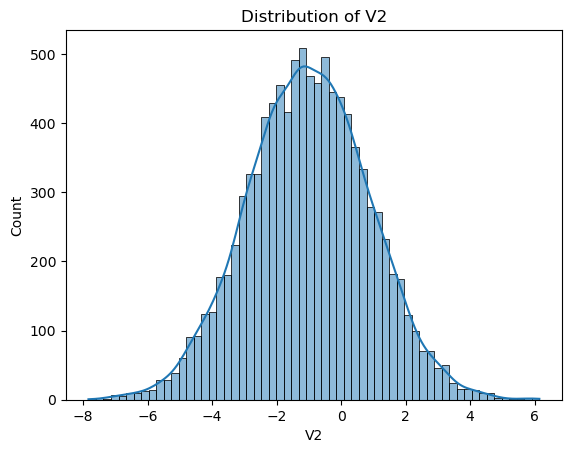

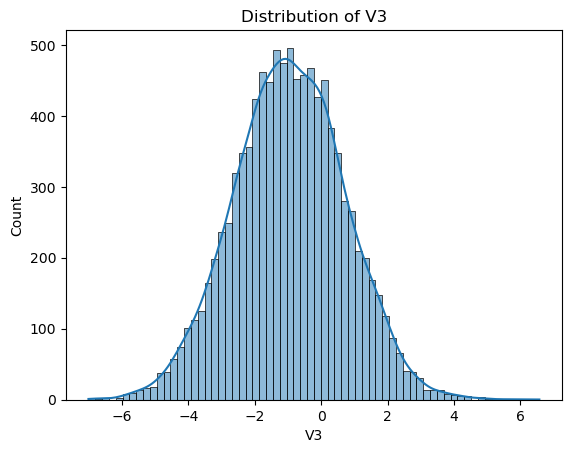

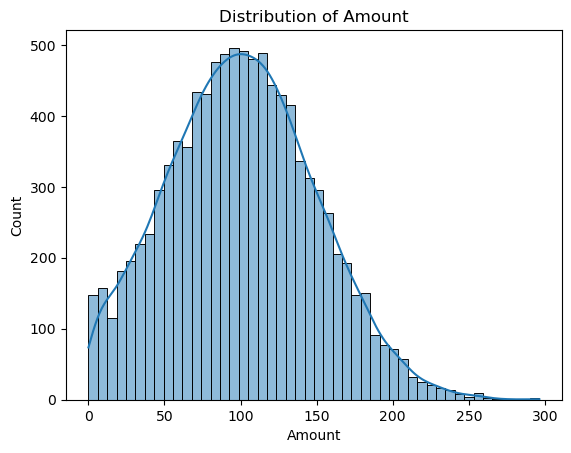

In [4]:
for feature in ['V1', 'V2', 'V3', 'Amount']:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


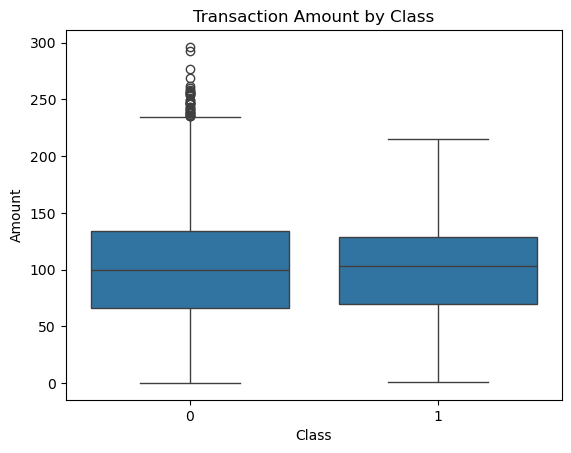

In [5]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.show()


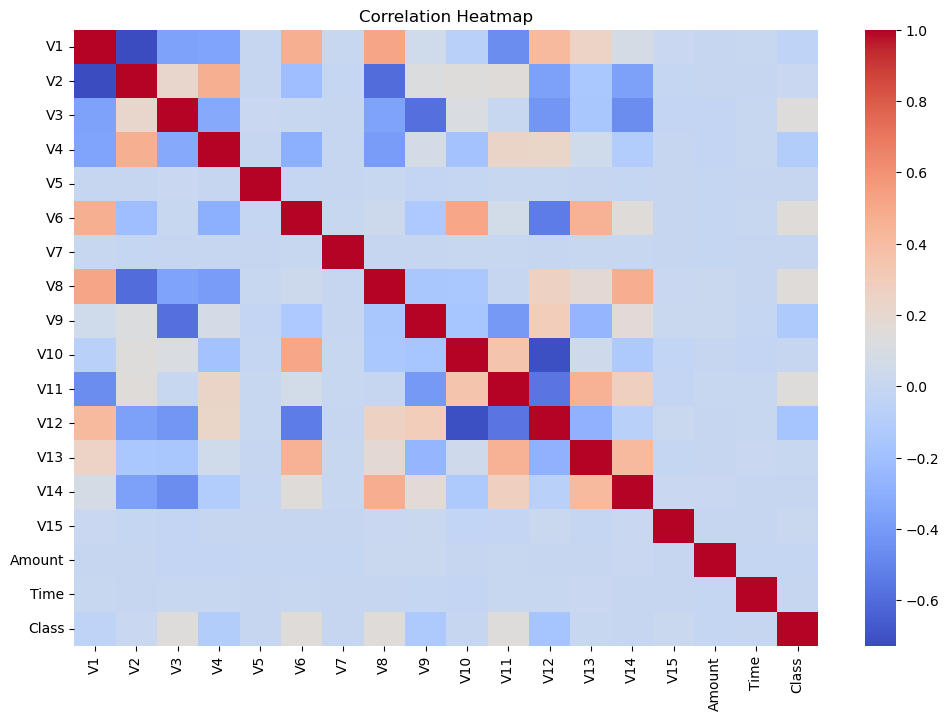

In [6]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


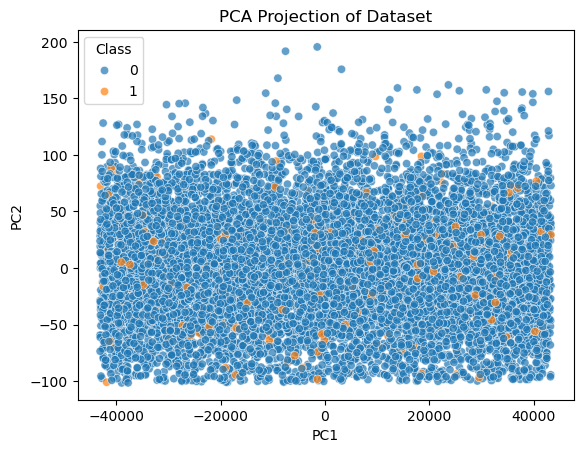

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop('Class', axis=1))
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = df['Class']

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Class', alpha=0.7)
plt.title('PCA Projection of Dataset')
plt.show()


In [8]:
X = df.drop('Class', axis=1)
y = df['Class']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("Original:", y_train.value_counts())
print("Balanced:", y_train_balanced.value_counts())


Original: Class
0    7798
1     202
Name: count, dtype: int64
Balanced: Class
0    7798
1    7798
Name: count, dtype: int64


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_balanced, y_train_balanced)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(random_state=42)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Logistic Regression Predictions
y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Random Forest Predictions
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluation function
def evaluate_model(y_test, y_pred, y_proba, model_name):
    print(f"--- {model_name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
    print("\n")

evaluate_model(y_test, y_pred_lr, y_proba_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, y_proba_rf, "Random Forest")


--- Logistic Regression ---
Confusion Matrix:
 [[1761  188]
 [  10   41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.95      1949
           1       0.18      0.80      0.29        51

    accuracy                           0.90      2000
   macro avg       0.59      0.85      0.62      2000
weighted avg       0.97      0.90      0.93      2000

ROC AUC Score: 0.8949989436513446


--- Random Forest ---
Confusion Matrix:
 [[1939   10]
 [  20   31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1949
           1       0.76      0.61      0.67        51

    accuracy                           0.98      2000
   macro avg       0.87      0.80      0.83      2000
weighted avg       0.98      0.98      0.98      2000

ROC AUC Score: 0.8883489773538968




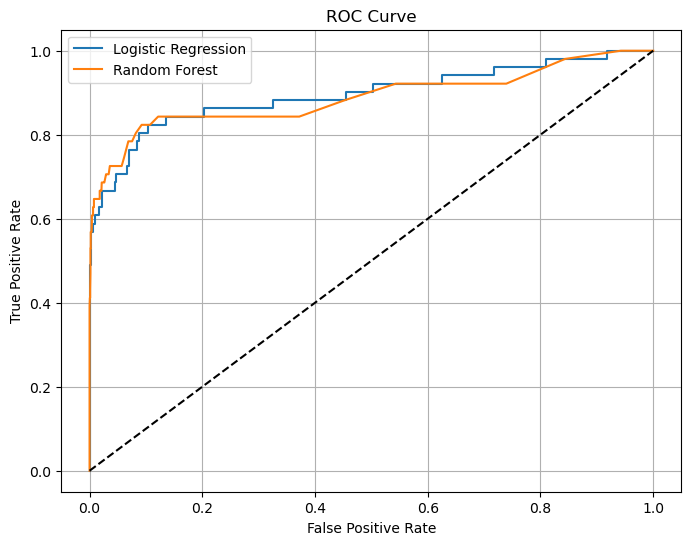

In [14]:
import matplotlib.pyplot as plt

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [15]:
import joblib

# Save model and scaler
joblib.dump(rf, 'fraud_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']